# Rock Papers and Scissors Project

In [1]:
import numpy as np
import scipy

In [2]:
import os
import zipfile

local_zip = 'C:/Users/Dell/tmp/rps.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = 'C:/Users/Dell/tmp'

train_dir = os.path.join(base_dir, 'rps')
test_dir = os.path.join(base_dir, 'rps-test-set')

# Directory with our training rock/paper/scissors pictures
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

# Directory with our testing rock/paper/scissors pictures
test_rock_dir = os.path.join(test_dir, 'rock')
test_paper_dir = os.path.join(test_dir, 'paper')
test_scissors_dir = os.path.join(test_dir, 'scissors')


In [4]:
train_rock_fnames = os.listdir( train_rock_dir )
train_paper_fnames = os.listdir( train_paper_dir )
train_scissors_fnames = os.listdir( train_scissors_dir )

print(train_rock_fnames[:10])
print(train_paper_fnames[:10])
print(train_scissors_fnames[:10])

['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


In [5]:
print('total training rock images :', len(os.listdir(      train_rock_dir ) ))
print('total training paper images :', len(os.listdir(      train_paper_dir ) ))
print('total training scissors images :', len(os.listdir(      train_scissors_dir ))) 

print('total testing rock images :', len(os.listdir( test_rock_dir ) ))
print('total testing paper images :', len(os.listdir( test_paper_dir ) ))
print('total testing scissors images :', len(os.listdir(      test_scissors_dir ) ))


total training rock images : 840
total training paper images : 840
total training scissors images : 840
total testing rock images : 124
total testing paper images : 124
total testing scissors images : 124


In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 3x3 configuration
nrows = 3
ncols = 3

pic_index = 0 # Index for iterating over images

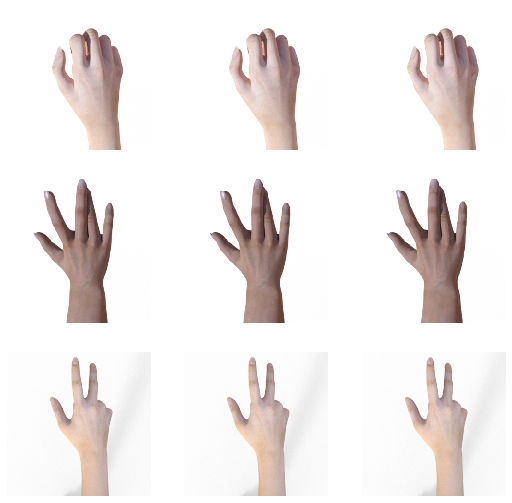

In [7]:
# Set up matplotlib fig, and size it to fit 3x3 pics
fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=3

next_rock_pix = [os.path.join(train_rock_dir, fname) 
                for fname in train_rock_fnames[ pic_index-3:pic_index] 
               ]

next_paper_pix = [os.path.join(train_paper_dir, fname) 
                for fname in train_paper_fnames[ pic_index-3:pic_index]
               ]

next_scissors_pix = [os.path.join(train_scissors_dir, fname) 
                for fname in train_scissors_fnames[ pic_index-3:pic_index] 
               ]


for i, img_path in enumerate(next_rock_pix+next_paper_pix+next_scissors_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [8]:
import tensorflow as tf

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    class_mode = 'categorical'
)

Found 2520 images belonging to 3 classes.


In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(3, activation='softmax')  
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = training_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    class_mode = 'categorical'
)

Found 372 images belonging to 3 classes.


In [14]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    verbose=1
)

Epoch 1/25
79/79 [==============================] - 148s 2s/step - loss: 0.7914 - accuracy: 0.7028 - val_loss: 0.2854 - val_accuracy: 0.8952
Epoch 2/25
79/79 [==============================] - 99s 1s/step - loss: 0.0655 - accuracy: 0.9813 - val_loss: 0.8990 - val_accuracy: 0.8199
Epoch 3/25
79/79 [==============================] - 100s 1s/step - loss: 0.1046 - accuracy: 0.9829 - val_loss: 0.3355 - val_accuracy: 0.9274
Epoch 4/25
79/79 [==============================] - 98s 1s/step - loss: 0.0300 - accuracy: 0.9956 - val_loss: 0.4992 - val_accuracy: 0.9059
Epoch 5/25
79/79 [==============================] - 98s 1s/step - loss: 1.6383e-05 - accuracy: 1.0000 - val_loss: 0.5932 - val_accuracy: 0.9086
Epoch 6/25
79/79 [==============================] - 97s 1s/step - loss: 0.0928 - accuracy: 0.9948 - val_loss: 0.4787 - val_accuracy: 0.9086
Epoch 7/25
79/79 [==============================] - 97s 1s/step - loss: 0.0735 - accuracy: 0.9905 - val_loss: 0.6027 - val_accuracy: 0.9059
Epoch 8/25
79/

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


In [15]:
print(history)

In [17]:
base_dir = 'C:/Users/Dell/tmp'

images_dir = os.path.join(base_dir, 'rps-validation')
images = os.listdir( images_dir )


In [18]:
print(images[:10])

['papersample', 'rocksample', 'scissorssample']


In [19]:
# Set up matplotlib fig, and size it to fit 3x3 pics
fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=9

next_image_pix = [os.path.join(images_dir, fname) 
                for fname in images[ pic_index-9:pic_index] 
               ]
                                               
for i, img_path in enumerate(next_image_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


<Figure size 648x648 with 0 Axes>

In [20]:
img = os.path.join(images_dir, 'rock3')
sample_datagen = ImageDataGenerator(rescale = 1./255)
sample_generator = training_datagen.flow_from_directory(
    images_dir,
    target_size = (150,150),
    class_mode = 'categorical'
)

Found 33 images belonging to 3 classes.


In [21]:
classes = model.predict(sample_generator, batch_size = 10)

In [22]:
print(classes)
for i in range(len(classes)):
    m = max(classes[i])
    for j in range(3):
        if classes[i][j] == m:
            classes[i][j] = 1
        else:
            classes[i][j] = 0
print(classes)

[[0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [3.2765797e-11 1.4171169e-09 1.0000000e+00]
 [7.5383517e-24 1.3161895e-25 1.0000000e+00]
 [1.0000000e+00 1.4861325e-34 7.1831660e-16]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 2.9459965e-17]
 [9.3220115e-01 2.1633415e-17 6.7798801e-02]
 [1.0000000e+00 8.8189407e-32 3.1973663e-10]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [2.3419638e-16 1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 1.6488278e-23 2.1025252e-19]
 [1.6902735e-31 4.5286264e-36 1.0000000e+00]
 [6.0786282e-15 1.1661976e-28 1.0000000e+00]
 [2.2297496e-19 1.0000000e+00 6.2156359e-38]
 [3.7633891e-25 1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 2.1281880e-32]
 [1.0914367e-28 1.3325891e-13 1.0000000e+00]
 [1.0000000e+00 1.4178118e-35 2.6745093e-20]
 [5.4522836e-28 1.0000000e+00 0.0000000e+00]
 [2.1715435e-19 3.4851691e-29 1.0000000e+00]
 [9.2520288e-36 1.0000000e+00 0.0000000e+00]
 [1.738493

In [18]:
#help(tf.python.keras.callbacks.History)

Text(0.5, 1.0, 'Training and validation loss')

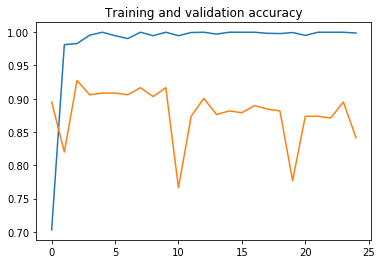

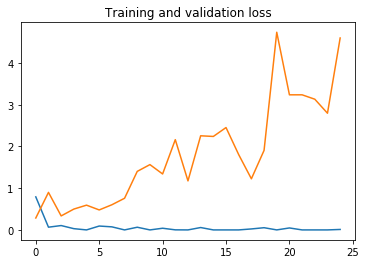

In [16]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )